MODELADO MACHINE LEARNING PARA DETECCION DE DoS

In [1]:
import sys, os

ruta_raiz = os.path.abspath("..")
if ruta_raiz not in sys.path:
    sys.path.append(ruta_raiz)
print("Ruta actual del notebook:", os.getcwd())

Ruta actual del notebook: c:\Users\alext\Desktop\TFG Alejandro\Notebooks


In [10]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from Scripts.modelo_rf import construccion_rf_pipeline, entrenamiento_y_evaluacion_rf
from Scripts.modelo_svm import construir_svm_pipeline, entrenamiento_y_evaluacion_svm
from Scripts.modelo_decisiontree import construir_decisiontree_pipeline, entrenamiento_y_evaluacion_dt
from Scripts.modelo_naivebayes import construccion_nb_pipeline, entrenamiento_y_evaluacion_nb
from Scripts.preparacion_datos import cargar_datos_csv, preprocesar_etiquetas, dividir_datos


PROCESADO DE DATOS

In [ ]:

ruta_csv = "../Datos_procesados_combinados/dataset_combinado.csv"
df = cargar_datos_csv(ruta_csv)
df = preprocesar_etiquetas(df, label_col = 'Label')
x_train, x_test, y_train, y_test = dividir_datos(df, label_col='Label')
print("Tamaños:", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Datos limpiados: Eliminadas 2867 filas que contenian inf o NaN
Si sale True no quedan infinitos:  True
Tamaños: (2262300, 71) (565576, 71) (2262300,) (565576,)


MODELOS DE ENTRENAMIENTO SUPERVISADO

Random Forest

Informe de clasificacion:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454265
           1       1.00      1.00      1.00    111311

    accuracy                           1.00    565576
   macro avg       1.00      1.00      1.00    565576
weighted avg       1.00      1.00      1.00    565576


 Matriz de confusion

[[453943    322]
 [   324 110987]]

Area bajo la curva ROC (AUC): 1.000
Orden de clases: [0 1]


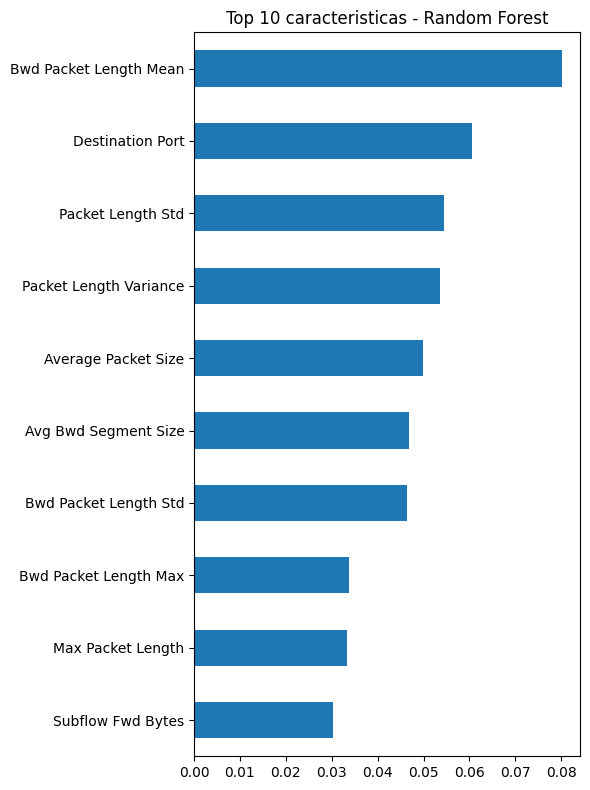

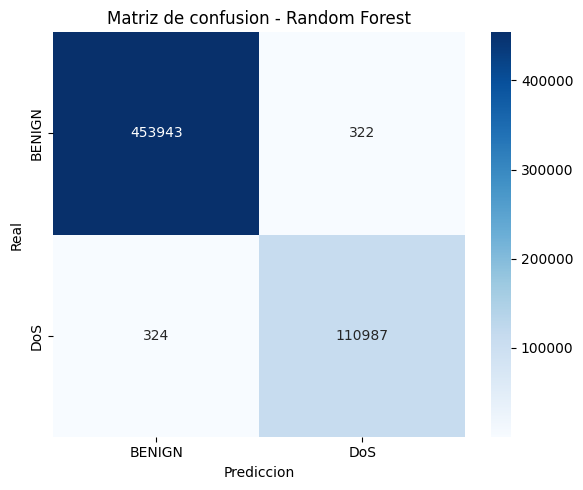

In [14]:

rf_pipe = construccion_rf_pipeline(n_estimators=100, random_state=19)
reporte_rf, cm_rf, auc_rf = entrenamiento_y_evaluacion_rf(rf_pipe, x_train, x_test, y_train, y_test, guardar_graficas=True, carpeta_salida="../Notebooks/IMAGENES/Graficas_RandomForest")

importances = rf_pipe.named_steps['rf'].feature_importances_
featured_importances = pd.Series(importances, index=x_train.columns).sort_values(ascending=True)
pyplot.figure(figsize=(6,8))
featured_importances.tail(10).plot(kind = 'barh')
pyplot.title("Top 10 caracteristicas - Random Forest")
pyplot.tight_layout()
pyplot.savefig("IMAGENES/Graficas_RandomForest/caracteristicas_importantes_randomforest.png")

carpeta_salida_rf = "../Notebooks/IMAGENES/Graficas_RandomForest"
#Matriz de confusion
print("Orden de clases:", rf_pipe.classes_)
plt.figure(figsize = (6,5))
sns.heatmap(cm_rf, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['BENIGN', 'DoS'], yticklabels = ['BENIGN', 'DoS'])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusion - Random Forest")
plt.tight_layout()
plt.savefig(f"{carpeta_salida_rf}/matriz_confusion_randomforest")

Support Vector Machine (SVM)

Informe de clasificacion:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    454265
           1       0.93      0.90      0.92    111311

    accuracy                           0.97    565576
   macro avg       0.95      0.94      0.95    565576
weighted avg       0.97      0.97      0.97    565576


 Matriz de confusion

[[446986   7279]
 [ 10828 100483]]

Area bajo la curva ROC (AUC): 0.991


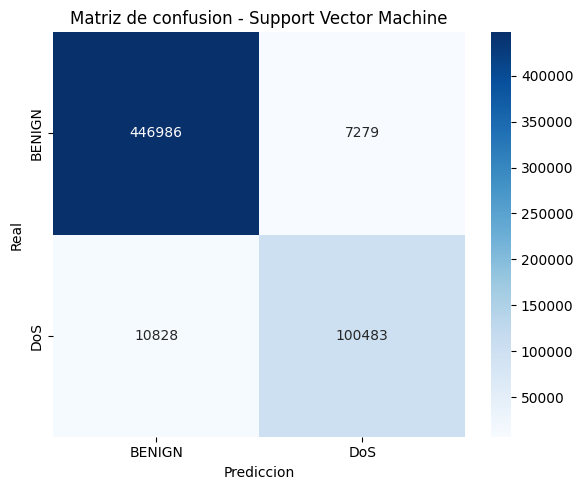

In [ ]:
#Hacemos una prueba previa con menos datos ya que con todo el dataset el SVM tarda mucho en procesarse
x_train_sample= x_train.sample(n = 10000, random_state = 19)
y_train_sample= y_train.loc[x_train_sample.index]


svm_pipe = construir_svm_pipeline(kernel = 'rbf', C = 1.0, gamma = 'scale', random_state= 19)
reporte_svm, cm_svm, auc_svm = entrenamiento_y_evaluacion_svm(svm_pipe, x_train_sample, x_test, y_train_sample, y_test, guardar_graficas= True, carpeta_salida="../Notebooks/IMAGENES/Graficas_SVM")
carpeta_salida_svm = "../Notebooks/IMAGENES/Graficas_SVM"
#Matriz de confusion
plt.figure(figsize = (6,5))
sns.heatmap(cm_svm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['BENIGN', 'DoS'], yticklabels = ['BENIGN', 'DoS'])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusion - Support Vector Machine")
plt.tight_layout()
plt.savefig(f"{carpeta_salida_svm}/matriz_confusion_SupportVectorMachine")

Decision Tree (DT)

Informe de clasificacion:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454265
           1       1.00      1.00      1.00    111311

    accuracy                           1.00    565576
   macro avg       1.00      1.00      1.00    565576
weighted avg       1.00      1.00      1.00    565576


 Matriz de confusion

[[453899    366]
 [   356 110955]]

Area bajo la curva ROC (AUC): 0.998


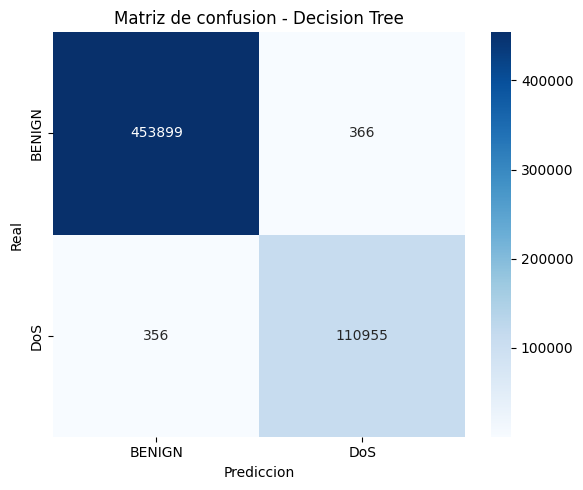

In [16]:
dt_pipe = construir_decisiontree_pipeline(criterion='gini', max_depth=None, random_state=19)
reporte_dt, cm_dt, auc_dt = entrenamiento_y_evaluacion_dt(dt_pipe, x_train, x_test, y_train, y_test, guardar_graficas=True, carpeta_salida="../Notebooks/IMAGENES/Graficas_DecisionTree")

carpeta_salida_dt = "../Notebooks/IMAGENES/Graficas_DecisionTree"
#Matriz de confusion
plt.figure(figsize = (6,5))
sns.heatmap(cm_dt, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['BENIGN', 'DoS'], yticklabels = ['BENIGN', 'DoS'])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusion - Decision Tree")
plt.tight_layout()
plt.savefig(f"{carpeta_salida_dt}/matriz_confusion_decisiontree.png")

MODELO Naive Bayes

Informe de clasificacion:

              precision    recall  f1-score   support

      BENIGN       0.90      0.94      0.92    454265
         DoS       0.70      0.55      0.62    111311

    accuracy                           0.86    565576
   macro avg       0.80      0.75      0.77    565576
weighted avg       0.86      0.86      0.86    565576

Matriz de confusion:

[[427821  26444]
 [ 49966  61345]]
Area bajo la curva ROC (AUC): 0.9378


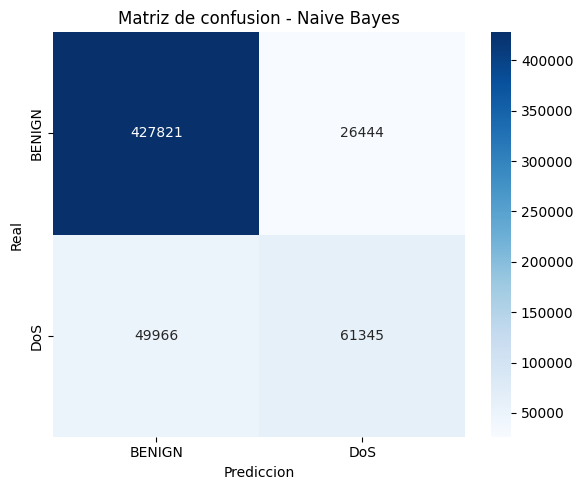

In [17]:
nb_pipe = construccion_nb_pipeline()
reporte_nb, cm_nb, auc_nb = entrenamiento_y_evaluacion_nb(nb_pipe, x_train, x_test, y_train, y_test, guardar_graficas=True, carpeta_salida="../Notebooks/IMAGENES/Graficas_NaiveBayes")

carpeta_salida_nb="../Notebooks/IMAGENES/Graficas_NaiveBayes"
#Matriz de confusion
plt.figure(figsize = (6,5))
sns.heatmap(cm_nb, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['BENIGN', 'DoS'], yticklabels = ['BENIGN', 'DoS'])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusion - Naive Bayes")
plt.tight_layout()
plt.savefig(f"{carpeta_salida_svm}/matriz_confusion_naivebayes")

ENTRENAMIENTO NO SUPERVISADO

KMEANS

Valores unicos de label: ['BENIGN' 'DDoS']
Evaluacion del modelo K-Means:

Adjusted Rand Index (ARI): 0.1591
Silhouette Score: 0.2215

Matriz de confusion:
[[76547 21139]
 [46680 81345]]


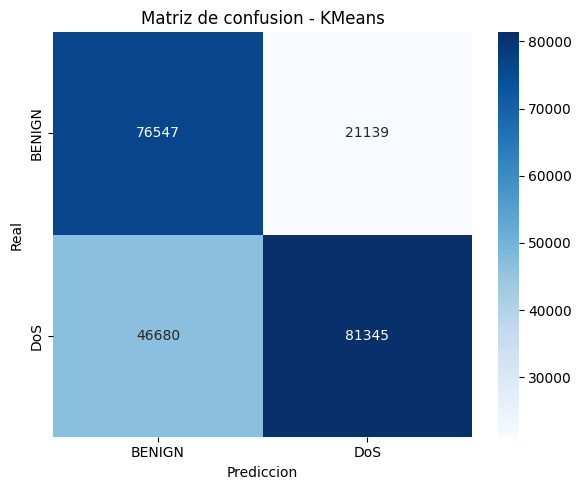

In [ ]:
from ScriptsNoSupervisado.modelo_kmeans import construccion_kmeans_pipeline, entrenamiento_y_evaluacion_kmeans

x = pd.read_csv("../Datos_procesados_no_supervisado/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX_preprocesado_no_label.csv")
y = pd.read_csv("../Datos_procesados_no_supervisado/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX_labels.csv")

if 'Label' in y.columns:
    valores_unicos = y['Label'].unique()
    print("Valores unicos de label:", valores_unicos)
    y = y['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1).values
else:
    y = y.values.ravel()
    

kmeans_pipe = construccion_kmeans_pipeline(n_clusters=2, random_state= 19)
ari, silhouette, cm_kmeans = entrenamiento_y_evaluacion_kmeans(kmeans_pipe, x, y)

#Matriz de confusion
plt.figure(figsize = (6,5))
sns.heatmap(cm_kmeans, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['BENIGN', 'DoS'], yticklabels = ['BENIGN', 'DoS'])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusion - KMeans")
plt.tight_layout()
plt.savefig("IMAGENES/Graficas_KMeans/matriz_confusion_kmeans")

MODELO ISOLATION FOREST

In [9]:
from ScriptsNoSupervisado.modelo_isolationforest import construccion_isolation_pipeline, entrenamiento_y_evaluacion_isolation


x = pd.read_csv("../Datos_procesados_no_supervisado/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX_preprocesado_no_label.csv")
y = pd.read_csv("../Datos_procesados_no_supervisado/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX_labels.csv")



if 'Label' in y.columns:
    valores_unicos = y['Label'].unique()
    print("Valores unicos de label:", valores_unicos)
    y_binario = y['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1).values
else:
    y_binario = y.values.ravel()
    
import collections
print("Distribucion de clases en y: ")
print(collections.Counter(y_binario))
#Extraemos los datos benignos para entrenamiento del modelo
x_entrenamiento = x[y_binario == 0]
print("Entrenamiento Isolation solo con conexiones benignas:", x_entrenamiento.shape)
x_evaluacion = x
y_evaluacion = y_binario

n_total = len(y_binario)
n_ataques = sum(y_binario)
contaminacion_real = n_ataques / n_total
print (f"Contaminacion real para el entrenamiento: {contaminacion_real:.4f}")

if_pipe = construccion_isolation_pipeline(random_state = 19, n_estimators = 100, contamination = 0.57)
ari_if, cm_if, reporte_if = entrenamiento_y_evaluacion_isolation(if_pipe, x_entrenamiento, x_evaluacion, y_evaluacion)

#Matriz de confusion
plt.figure(figsize = (6,5))
sns.heatmap(cm_if, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ["BENIGN", "DoS"], yticklabels = ["BENIGN", "DoS"])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de Confusion - Isolation Forest")
plt.tight_layout()
plt.savefig("IMAGENES/Graficas_IsolationForest/matriz_confusion_isolationforest.png")
plt.close()

Valores unicos de label: ['BENIGN' 'DDoS']
Distribucion de clases en y: 
Counter({np.int64(1): 128025, np.int64(0): 97686})
Entrenamiento Isolation solo con conexiones benignas: (97686, 71)
Contaminacion real para el entrenamiento: 0.5672


TypeError: construccion_isolation_pipeline() got an unexpected keyword argument 'contamination'